<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5/%EC%B9%BC%EB%A1%9C%EB%A6%AC%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습/농림수산식품교육문화정보원_칼로리 정보_20190926.csv",encoding='cp949')

In [ ]:
data.head()

,음식명,1인분칼로리(kcal),탄수화물(g),단백질(g),지방(g),콜레스트롤(g),식이섬유(g),나트륨(g),등록일
0,가래떡(떡국용),311.0,68.3,5.3,1.0,0.0,0.0,231.0,NaN
1,가래떡(떡볶이용),96.0,21.0,1.6,0.3,0.0,0.0,71.0,NaN
2,가자미,58.0,0.1,9.9,1.7,44.6,0.0,104.0,NaN
3,가자미구이,76.0,0.2,11.2,3.1,50.1,0.0,255.0,2012-01-06
4,가자미조림,45.4,2.4,6.6,1.2,27.0,0.4,183.0,2012-01-04


In [ ]:
data=data.drop('등록일',axis=1)

In [ ]:
data

,음식명,1인분칼로리(kcal),탄수화물(g),단백질(g),지방(g),콜레스트롤(g),식이섬유(g),나트륨(g)
0,가래떡(떡국용),311.0,68.3,5.3,1.0,0.0,0.0,231.0
1,가래떡(떡볶이용),96.0,21.0,1.6,0.3,0.0,0.0,71.0
2,가자미,58.0,0.1,9.9,1.7,44.6,0.0,104.0
3,가자미구이,76.0,0.2,11.2,3.1,50.1,0.0,255.0
4,가자미조림,45.4,2.4,6.6,1.2,27.0,0.4,183.0
...,...,...,...,...,...,...,...,...
632,효모,0.0,0.0,0.0,0.0,0.0,0.0,0.0
633,후렌치후라이,367.0,47.2,4.4,19.7,0.0,4.0,223.0
634,후르츠샐러드(칵테일),29.0,7.7,0.1,0.2,0.0,0.2,1.0
635,후추,3.0,0.7,0.1,0.0,0.0,0.1,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   음식명           637 non-null    object 
 1   1인분칼로리(kcal)  637 non-null    float64
 2   탄수화물(g)       637 non-null    float64
 3   단백질(g)        637 non-null    float64
 4   지방(g)         637 non-null    float64
 5   콜레스트롤(g)      637 non-null    float64
 6   식이섬유(g)       637 non-null    float64
 7   나트륨(g)        637 non-null    float64
dtypes: float64(7), object(1)
memory usage: 39.9+ KB


In [ ]:
data.isnull().sum()

음식명             0
1인분칼로리(kcal)    0
탄수화물(g)         0
단백질(g)          0
지방(g)           0
콜레스트롤(g)        0
식이섬유(g)         0
나트륨(g)          0
dtype: int64

In [ ]:
data.corr()

,1인분칼로리(kcal),탄수화물(g),단백질(g),지방(g),콜레스트롤(g),식이섬유(g),나트륨(g)
1인분칼로리(kcal),1.000000,0.842815,0.728056,0.671837,0.435965,0.312470,0.524944
탄수화물(g),0.842815,1.000000,0.416867,0.231144,0.180436,0.374561,0.456934
단백질(g),0.728056,0.416867,1.000000,0.622770,0.616410,0.259454,0.541662
지방(g),0.671837,0.231144,0.622770,1.000000,0.448672,0.095386,0.308406
콜레스트롤(g),0.435965,0.180436,0.616410,0.448672,1.000000,0.047408,0.339476
식이섬유(g),0.312470,0.374561,0.259454,0.095386,0.047408,1.000000,0.355645
나트륨(g),0.524944,0.456934,0.541662,0.308406,0.339476,0.355645,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_te

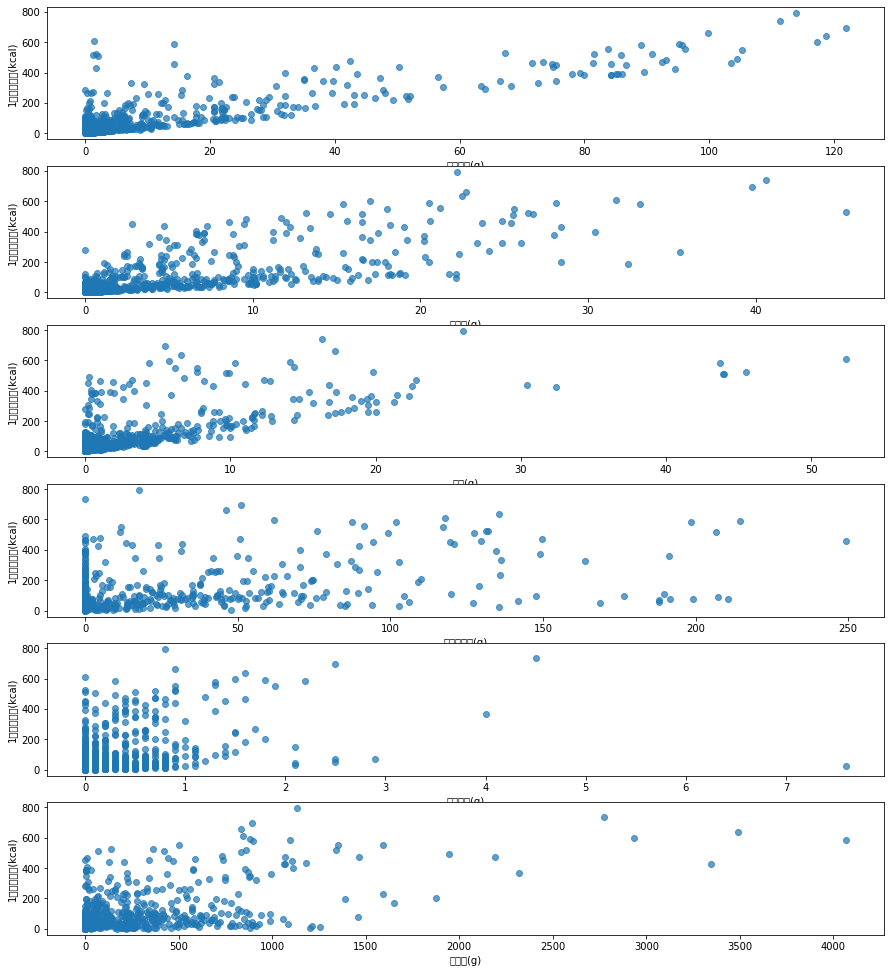

In [ ]:
plt.figure(figsize=(15,20))
for i in range(2,8):
  plt.subplot(7,1,i-1)
  plt.scatter(data.iloc[:,i], data.iloc[:, 1], alpha=0.7)
  plt.xlabel(data.columns[i])
  plt.ylabel(data.columns[1])

In [ ]:
y=data['1인분칼로리(kcal)']

In [ ]:
y

0      311.0
1       96.0
2       58.0
3       76.0
4       45.4
       ...  
632      0.0
633    367.0
634     29.0
635      3.0
636    387.2
Name: 1인분칼로리(kcal), Length: 637, dtype: float64

In [ ]:
X=data.drop(['1인분칼로리(kcal)','음식명'],axis=1)

칼로리 회귀
1. 선형회귀
2. 다항회귀
3. SVM 회귀
4. 결정트리 회귀

In [ ]:
#선형회귀
X_1=X.copy()

In [ ]:
X_1=X_1.drop([	"지방(g)",	"콜레스트롤(g)",	"식이섬유(g)",	"나트륨(g)"],axis=1)

In [ ]:
X_1=X_1.to_numpy()

In [ ]:
X_1.shape

(637, 2)

In [ ]:
y.shape

(637,)

In [ ]:
train_input,test_input,train_target,test_target=train_test_split(X_1,y,test_size=0.2)
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)

In [ ]:
#선형회귀
reg=LinearRegression()
reg.fit(train_input,train_target)

LinearRegression()

In [ ]:
reg.coef_

array([3.96968669, 8.67420207])

In [ ]:
reg.intercept_

5.564271375924406

In [ ]:
reg.score(train_input,train_target)

0.8920837065434237

In [ ]:
reg.score(val_input,val_target)

0.9203269638964622

In [ ]:
reg.score(test_input,test_target)

0.8440278380866015

ValueError: ignored

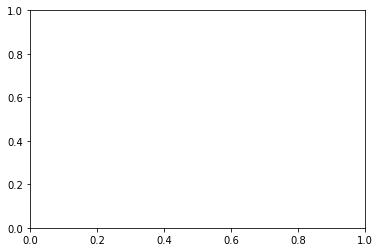

In [ ]:
plt.scatter(train_input,train_target)
plt.plot([0,120],[0*reg.coef_+reg.intercept_,120*reg.coef_+reg.intercept_])

In [ ]:
#다항회귀
train_poly=np.column_stack((train_input**2,train_input))
val_poly=np.column_stack((val_input**2,val_input))
test_poly=np.column_stack((test_input**2,test_input))

In [ ]:
reg2=LinearRegression()
reg2.fit(train_poly,train_target)

LinearRegression()

In [ ]:
print(reg2.coef_,reg2.intercept_)

[-0.01613364 -0.02381085  5.34004919  9.56886366] -4.008139909708703


ValueError: ignored

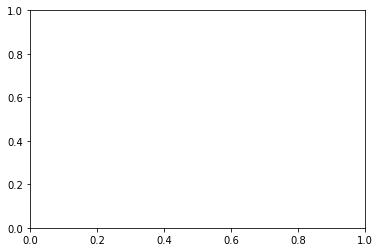

In [ ]:
point=np.arange(0,120)
plt.scatter(train_input,train_target)
plt.plot(point,-3.40336570e-04*point**2+5.16994692e+00*point+41.39649447946975)
plt.show()

In [ ]:
reg2.score(train_poly,train_target)

0.8987259583471117

In [ ]:
reg2.score(val_poly,val_target)

0.9154689477741302

In [ ]:
reg2.score(test_poly,test_target)

0.8438751046779637

In [ ]:
#다중회귀
X_2=X.to_numpy()

In [ ]:
X_2

array([[6.83e+01, 5.30e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.31e+02],
       [2.10e+01, 1.60e+00, 3.00e-01, 0.00e+00, 0.00e+00, 7.10e+01],
       [1.00e-01, 9.90e+00, 1.70e+00, 4.46e+01, 0.00e+00, 1.04e+02],
       ...,
       [7.70e+00, 1.00e-01, 2.00e-01, 0.00e+00, 2.00e-01, 1.00e+00],
       [7.00e-01, 1.00e-01, 0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00],
       [8.50e+01, 6.70e+00, 7.00e-01, 0.00e+00, 4.00e-01, 7.00e+00]])

In [ ]:
train_input,test_input,train_target,test_target=train_test_split(X_2,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=5)
poly.fit(train_input)
train_poly=poly.transform(train_input)

In [ ]:
print(train_poly.shape)

(477, 462)


In [ ]:
reg3=LinearRegression()
reg3.fit(train_poly,train_target)

LinearRegression()

In [ ]:
test_poly=poly.transform(test_input)

In [ ]:
reg3.score(train_poly,train_target)

0.8390097768570373

In [ ]:
reg3.score(test_poly,test_target)

-10427719.821434978

In [ ]:
#SVM 회귀
X_3=X.to_numpy()

In [ ]:
X_3

array([[6.83e+01, 5.30e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.31e+02],
       [2.10e+01, 1.60e+00, 3.00e-01, 0.00e+00, 0.00e+00, 7.10e+01],
       [1.00e-01, 9.90e+00, 1.70e+00, 4.46e+01, 0.00e+00, 1.04e+02],
       ...,
       [7.70e+00, 1.00e-01, 2.00e-01, 0.00e+00, 2.00e-01, 1.00e+00],
       [7.00e-01, 1.00e-01, 0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00],
       [8.50e+01, 6.70e+00, 7.00e-01, 0.00e+00, 4.00e-01, 7.00e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
X_sub,X_val,y_sub,y_val=train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
pipe_scr=make_pipeline(StandardScaler(),SVR(kernel='linear'))
p_list=[0.01,0.1,1,10,100]

param_grid={'svr__C':p_list,"svr__gamma":p_list}
gs=GridSearchCV(estimator=pipe_scr,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.best_params_)


{'svr__C': 0.01, 'svr__gamma': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  category=UserWarning,


In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

20322.99828823364

In [ ]:
#SVM 선형회귀
from sklearn.svm import SVR
scores = []
for thisC in [*range(1,20)]:
    svc=SVR(kernel='linear',C=thisC)
    model=svc.fit(X_train_std,y_train)
    scoreTrain=model.score(X_train_std,y_train)
    scoreVal=model.score(X_val_std,y_val)
    scoreTest=model.score(X_test_std,y_test)
    print("선형 SVM : C:{}, training score:{:2f},val score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain,scoreVal, scoreTest))
    scores.append([scoreTrain,scoreVal, scoreTest])

선형 SVM : C:1, training score:0.974141,val score:0.995528, test score:0.975264
선형 SVM : C:2, training score:0.974557,val score:0.995253, test score:0.975775
선형 SVM : C:3, training score:0.974591,val score:0.995169, test score:0.975833
선형 SVM : C:4, training score:0.974591,val score:0.995128, test score:0.975840
선형 SVM : C:5, training score:0.974590,val score:0.995076, test score:0.975840
선형 SVM : C:6, training score:0.974596,val score:0.994995, test score:0.975859
선형 SVM : C:7, training score:0.974606,val score:0.994971, test score:0.975871
선형 SVM : C:8, training score:0.974608,val score:0.994967, test score:0.975878
선형 SVM : C:9, training score:0.974606,val score:0.994956, test score:0.975881
선형 SVM : C:10, training score:0.974603,val score:0.994945, test score:0.975880
선형 SVM : C:11, training score:0.974603,val score:0.994942, test score:0.975884
선형 SVM : C:12, training score:0.974602,val score:0.994915, test score:0.975887
선형 SVM : C:13, training score:0.974602,val score:0.994914, te

In [ ]:
from sklearn import svm

In [ ]:
# 함수 정의
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

    
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
 

In [ ]:
c=1.0
models=(svm.SVR(kernel="linear",C=c),
        svm.LinearSVR(C=c,max_iter=10000),
        svm.SVR(kernel="poly",gamma='auto',C=c))
models = (clf.fit(X, y) for clf in models)

In [ ]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with polynomial (degree 3) kernel')

TypeError: ignored

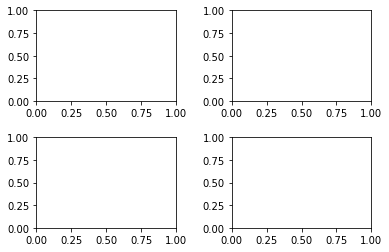

In [ ]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_3[:, 0], X_3[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(model, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

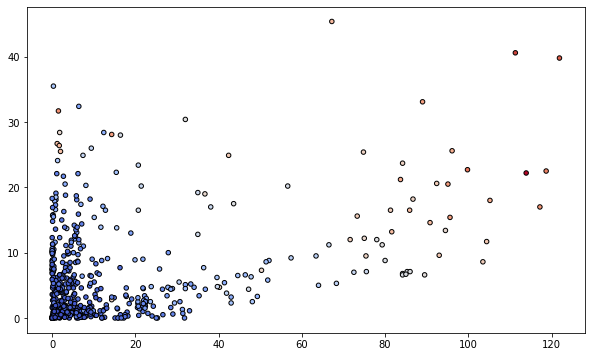

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_3[:,0], X_3[:,1],  c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
#SVM 비선형회귀
from sklearn.svm import LinearSVR
for thisC in [1,3,5,10,40,60,80,100]:
    model2=LinearSVR(C=thisC).fit(X_train_std,y_train)
    scoretrain=model2.score(X_train_std,y_train)
    scoretest=model2.score(X_test_std,y_test)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f} \n".format(thisC,scoretrain, scoretest)) 

선형 SVM : C:1, training score:0.964387, test score:0.990233 

선형 SVM : C:3, training score:0.966676, test score:0.992139 

선형 SVM : C:5, training score:0.966727, test score:0.992132 

선형 SVM : C:10, training score:0.966736, test score:0.992138 

선형 SVM : C:40, training score:0.966714, test score:0.992124 

선형 SVM : C:60, training score:0.966763, test score:0.992133 

선형 SVM : C:80, training score:0.966789, test score:0.992052 

선형 SVM : C:100, training score:0.966857, test score:0.992101 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#의사결정트리
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_4=X.to_numpy()
train_input,test_input,train_target,test_target=train_test_split(X_4,y)

In [ ]:
def fit_model(data,target):
  tree2=DecisionTreeRegressor()
  param_grid={'max_depth':(1,2,3,4,5,6,7,8,9,10)}
  reg=GridSearchCV(tree2,param_grid,scoring='accuracy',cv=3)
  reg.fit(data,target)
  return reg.best_estimator_

In [ ]:
tree2=DecisionTreeRegressor()
param_grid={'max_depth':(1,2,3,4,5,6,7,8,9,10)}
reg=GridSearchCV(tree2,param_grid,scoring='accuracy',cv=10,n_jobs=-1)
reg.fit(X_train,y_train)
print(reg.best_params_)

{'max_depth': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


In [ ]:
model=fit_model(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

In [ ]:
a=[[22.0,1.0,6.0,5.0,0,0.16]]

In [ ]:
model.predict(a)[0] 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


70.839911308204

In [ ]:
plt.figure(figsize=(20, 5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [ ]:
medv = y


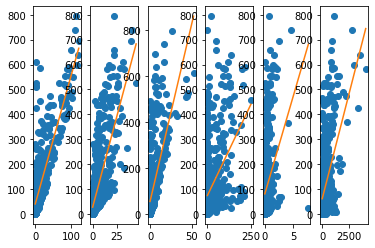

In [ ]:
for i, col in enumerate(X.columns):
    plt.subplot(1, 6, i+1)
    x = X[col]
    y = medv
    plt.plot(x, y, 'o')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

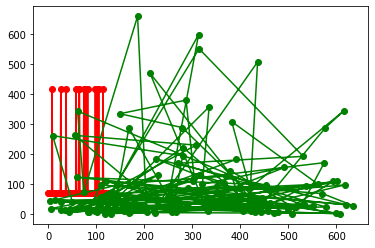

In [ ]:
y_pred = model.predict(X_test)
plt.figure()
plt.plot(y_pred, 'o-', color="r", label="Predicted kcal")
plt.plot(y_test, 'o-', color="g", label="Actual kcal")

In [ ]:
tree=DecisionTreeRegressor(max_depth=4)

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
tree.score(X_train,y_train) 

0.9505562774457795

In [ ]:
tree.score(X_test,y_test) 

0.7728258178087986

In [ ]:
tree.get_depth() 

4

In [ ]:
tree.get_n_leaves()

16

In [ ]:
from sklearn.tree import plot_tree

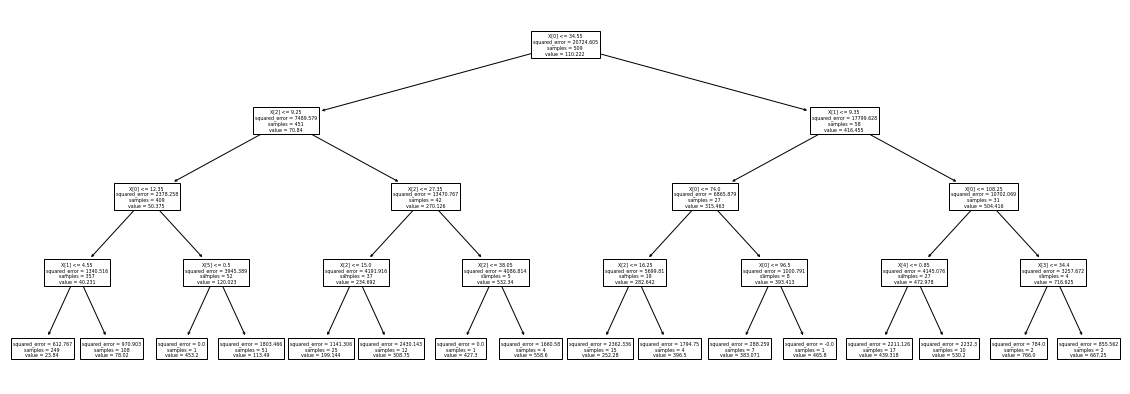

In [ ]:
plt.figure(figsize=(20,7))
plot_tree(tree);

In [ ]:
tree.feature_importances_ 

array([0.66912757, 0.07343618, 0.24096231, 0.        , 0.00518636,
       0.01128759])

In [ ]:
tree.predict([[22.0,1.0,6.0,5.0,0,0.16]]) 

array([98.98382353])